<a href="https://colab.research.google.com/github/divi1287/Infotraining/blob/branch1/MNIST_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense
from keras.optimizers import Adam

In [4]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [5]:
print(X_train.shape)

(60000, 28, 28)


In [6]:
print(y_train.shape)

(60000,)


In [7]:
print(X_test.shape)

(10000, 28, 28)


In [8]:
print(y_test.shape)

(10000,)


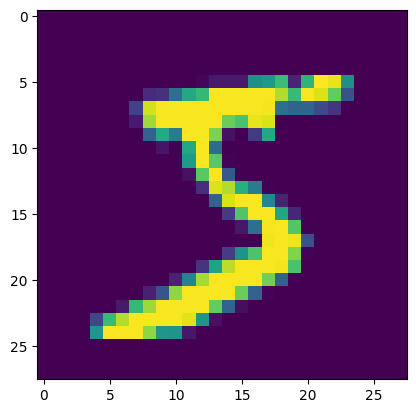

In [9]:
plt.imshow(X_train[0])

In [10]:
#Showing corresponding label for the above
print(y_train[0])

5


In [11]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [12]:
#Scalar Operation
X_train=X_train/255
X_test=X_test/255

In [13]:
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [14]:
# Simple Neural networks
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation="relu"))
model.add(Dense(10,activation="softmax"))

In [15]:
learning_rates = np.arange(0.001, 0.01, 0.001)
#batch_sizes = [10, 100, 200, 300, 400, 500, 1000, 2000, 3000, 4000]
lr_results=[]
accuracy_results=[]
#batch_results=[]
for lr in learning_rates:
  #for batch_size in batch_sizes:
    optimizer = Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history=model.fit(X_train,y_train,batch_size=64,epochs=10,verbose=1,validation_split=0.2)
    loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
    print(f"Learning Rate: {lr:.4f} - Test Accuracy: {accuracy:.4f}")
    lr_results.append(lr)
    #batch_results.append(batch_size)
    accuracy_results.append(accuracy)



Epoch 1/10
750/750 [==============================] - 8s 9ms/step - loss: 0.3313 - accuracy: 0.9070 - val_loss: 0.1801 - val_accuracy: 0.9492
Epoch 2/10
750/750 [==============================] - 7s 10ms/step - loss: 0.1522 - accuracy: 0.9564 - val_loss: 0.1344 - val_accuracy: 0.9610
Epoch 3/10
750/750 [==============================] - 4s 5ms/step - loss: 0.1079 - accuracy: 0.9684 - val_loss: 0.1148 - val_accuracy: 0.9668
Epoch 4/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0826 - accuracy: 0.9757 - val_loss: 0.1007 - val_accuracy: 0.9706
Epoch 5/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0651 - accuracy: 0.9816 - val_loss: 0.0969 - val_accuracy: 0.9713
Epoch 6/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0524 - accuracy: 0.9850 - val_loss: 0.0868 - val_accuracy: 0.9743
Epoch 7/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0422 - accuracy: 0.9881 - val_loss: 0.0847 - val_accuracy: 0.9759
Epoch

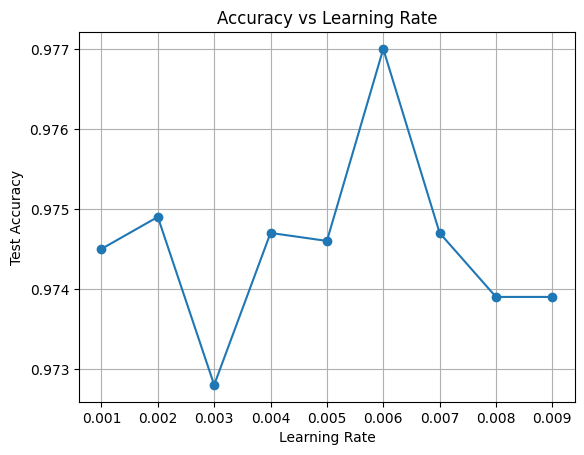

In [16]:
#Accuracy vs Learning Rate
plt.plot(lr_results, accuracy_results, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Test Accuracy')
plt.title('Accuracy vs Learning Rate')
plt.grid(True)

In [23]:
#learning_rates = np.arange(0.001, 0.1, 0.001)
batch_sizes = [10, 100, 200, 300, 400, 500, 1000, 2000, 3000, 4000]
#lr_results=[]
accuracy_results=[]
batch_results=[]
#for lr in learning_rates:
for batch_size in batch_sizes:
  learning_rate = 0.01 # Adjust the learning rate as needed
  optimizer = Adam(learning_rate=learning_rate)
  model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  history=model.fit(X_train,y_train,batch_size=64,epochs=10,verbose=1,validation_split=0.2)
  loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
  print(f"Learning Rate: {lr:.4f} - Test Accuracy: {accuracy:.4f}")
  #lr_results.append(lr)
  batch_results.append(batch_size)
  accuracy_results.append(accuracy)

Epoch 1/10
750/750 [==============================] - 5s 6ms/step - loss: 0.0630 - accuracy: 0.9984 - val_loss: 4.1925 - val_accuracy: 0.9768
Epoch 2/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0594 - accuracy: 0.9988 - val_loss: 4.2085 - val_accuracy: 0.9748
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0594 - accuracy: 0.9987 - val_loss: 4.4970 - val_accuracy: 0.9749
Epoch 4/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0687 - accuracy: 0.9986 - val_loss: 3.8886 - val_accuracy: 0.9761
Epoch 5/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0605 - accuracy: 0.9986 - val_loss: 4.5385 - val_accuracy: 0.9755
Epoch 6/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0404 - accuracy: 0.9990 - val_loss: 4.2466 - val_accuracy: 0.9771
Epoch 7/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0365 - accuracy: 0.9990 - val_loss: 4.6770 - val_accuracy: 0.9758
Epoch 

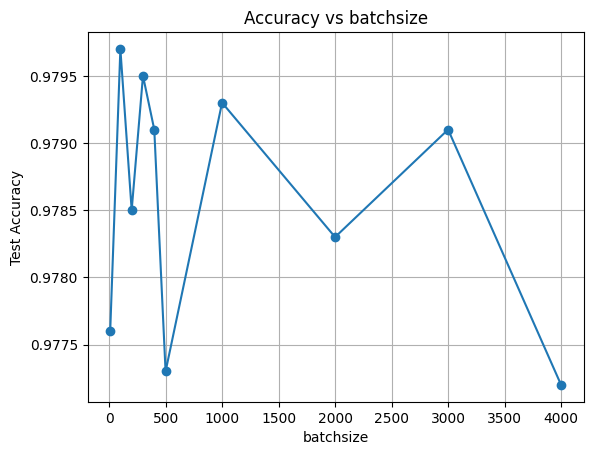

In [24]:
#Accuracy vs Batch_size
plt.plot(batch_results, accuracy_results, marker='o')
plt.xlabel('batchsize')
plt.ylabel('Test Accuracy')
plt.title('Accuracy vs batchsize')
plt.grid(True)

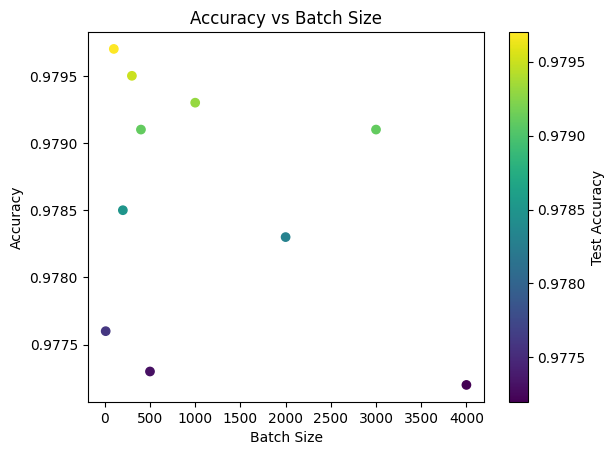

In [25]:
plt.scatter(batch_results, accuracy_results, c=accuracy_results, cmap='viridis')
plt.colorbar(label='Test Accuracy')
plt.xlabel('Batch Size')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Batch Size')
plt.show()

Learning Rate Scheduler

In [26]:
tf.keras.callbacks.LearningRateScheduler(schedule, verbose=0)

NameError: ignored

In [ ]:
def scheduler(epoch, lr):
  if epoch < 10:
    return lr
  else
    return lr * tf.math.exp(-0.1)

model = tf.keras.models.Sequential([tf.keras.layers.Dense(10)])
model.compile(tf.keras.optimizers.SGD(), loss='mse')
round(model.optimizer.lr.numpy(), 5)


In [ ]:
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)
history = model.fit(np.arange(100).reshape(5, 20), np.zeros(5),epochs=15, callbacks=[callback], verbose=0)
round(model.optimizer.lr.numpy(), 5)

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(lr, accuracy, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel(' accuracy')
plt.title('Learning Rate vs.  Accuracy')
for i, txt in enumerate(accuracy):
    plt.annotate(f'{txt:.2f}', (learning_rates[i], accuracy[i]), textcoords="offset points", xytext=(0,10), ha='center')

In [ ]:
training_loss = history.history['loss']

# Access validation loss history
validation_loss = history.history['val_loss']

# Access training accuracy history
training_accuracy = history.history['accuracy']

# Access validation accuracy history
validation_accuracy = history.history['val_accuracy']
print(validation_loss)
print(validation_accuracy)
print(training_accuracy)


In [ ]:
model.evaluate(X_test,y_test)

In [ ]:
model.predict(X_test)

In [ ]:
predicted_classes = model.predict(X_test)
predicted_classes = np.argmax(predicted_classes, axis=1)

In [ ]:
print(predicted_classes)

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])